In [ ]:
# To use this boilerplate, make sure to attend to:
#
#   Fourth Cell (Markdown)
#
#       The header - are you writing a function, or...?
#
#   Fifth Cell (Python Code)
#
#       Are all comments necessary? 
#       Are you really showcasing your knowledge of Python/data/plotting with the code as written--did you do your due diligence?
#       "It works" is not "It is understood," and "It is understood" is not "It is strong" or "It is best."
#       If it feels like an amateurish solution, there's a good 70% chance it is.
#       If it feels like a professional solution, there's a good 30% chance it's an amateurish solution.
#
#   Cell 6+ (Python Code or Markdown)
#
#       Do all test cells have headers?
#       Are all test cells commented?
#       Does your testing reasonably capture use cases and/or misuse cases?
#       Are cells with variable declarations sensible and/or even necessary?
#       Did you delete any unused/scratchpaper cells?





# DID YOU DELETE THIS CELL?


# Data Analysis in Python

## Curriculum Project 4

### from [FreeCodeCamp.org](https://www.freecodecamp.org)


### [Click here for an Overview of Project Requirements](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)


In [1]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')

# Clean data
# *** The above comment is referring to the project requirement that we trim the
# *** top and bottom 2.5% of page view values. 

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


# *** these are needed in a couple of the functions below.
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Draw a line plot:

From the project requirements page:

- title should be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'
- x label should be 'Date'
- y label should be 'Page Views'


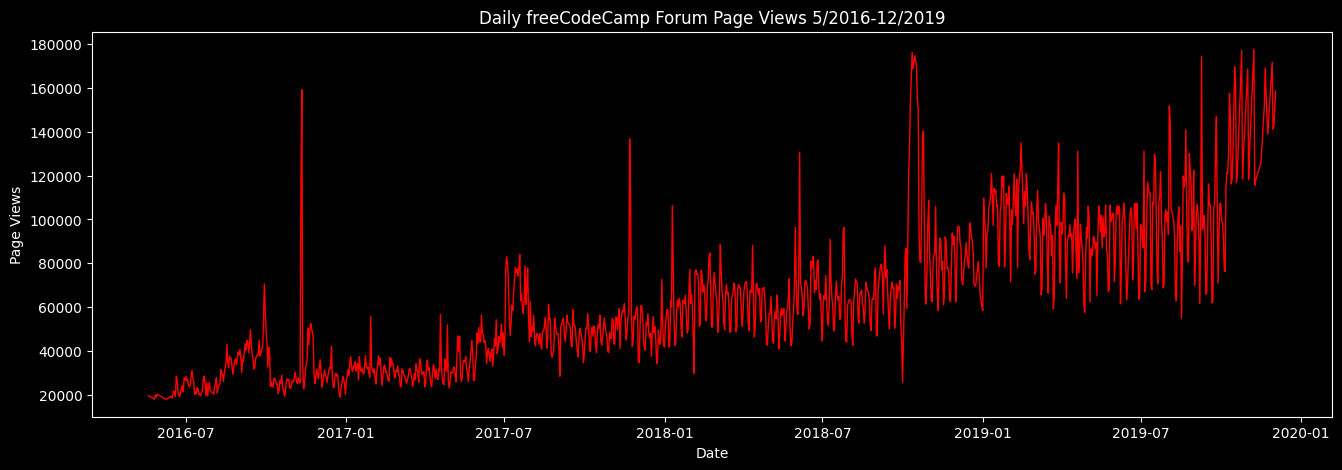

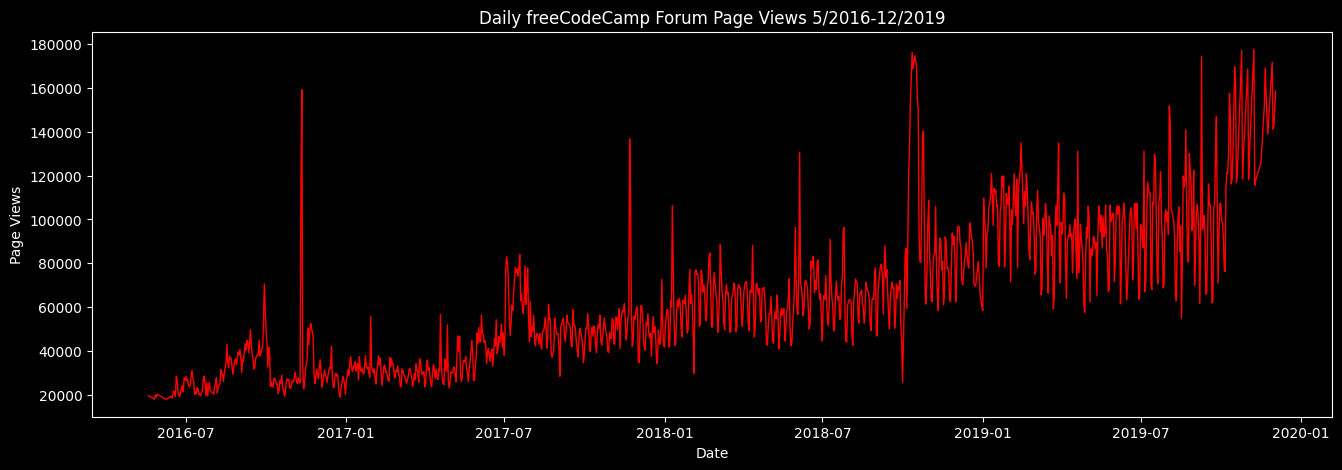

In [12]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.plot(df.index, df['value'], 'r', linewidth=1)
    ax.set_xlabel('Date'), 
    ax.set_ylabel('Page Views'), 
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019'), 
    fig.savefig('line_plot.png')
    return fig

''

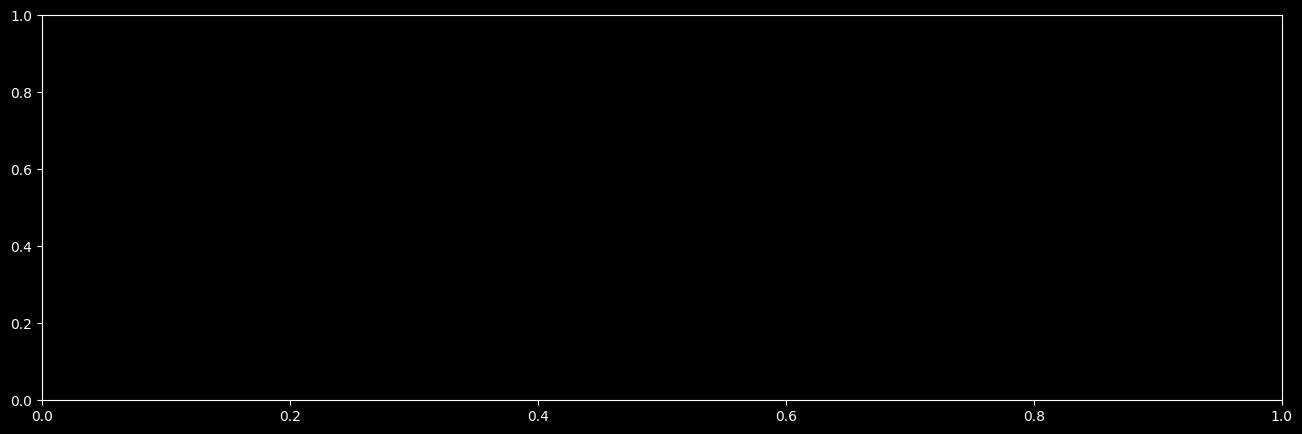

# Draw a  bar plot:

From the project requirements page:

- Show average daily page views by month, grouped by year
- legend should show month labels and be titled 'Months'
- x label should be 'Years'
- y label should be 'Average Page Views'

In [4]:
def draw_bar_plot():

    # Copy and modify data for monthly bar plot
    # *** Extract months and years to individual columns with a lambda
    # *** retitle the columns so they'll match the project requirements and look good, too
    df_bar = pd.DataFrame(
        data= {
            'Years': df.index.to_series().apply(lambda t: t.year), 
            'Month': df.index.to_series().apply(lambda t: t.month),
            'Average Page Views': df['value']
            }
        )
    
    # *** use groupby to select each unique month/year combination, returning the mean.
    # *** reset the index so we don't confuse ourselves or our plotting backend.
    df_bar = df_bar.groupby(['Month', 'Years']).mean().reset_index()
    
    # *** now that everything is grouped and we have the mean for the pageviews,
    # *** set the values for the "Month" column to actual month names.
    df_bar['Month'] = df_bar['Month'].apply(lambda t: month_labels[int(t) - 1])
    
    #Use seaborn to draw the plot.
    fig = sns.catplot(
        data=df_bar, 
        x='Years', 
        y='Average Page Views', 
        kind='bar', 
        hue='Month', 
        legend_out=False
        )
    
    fig = fig.fig
    fig.savefig('bar_plot.png')
    return fig

# Draw two box plots:

From the project requirements page:

- First box plot should show value distribution by year
- First box plot should be titled 'Year-wise Box Plot (Trend)'
- Second box plot should show value distribution by month
- Second box plot should be titled 'Month-wise Box Plot (Seasonality)'
- Month labels should start at Jan

<AxesSubplot: title={'center': 'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>

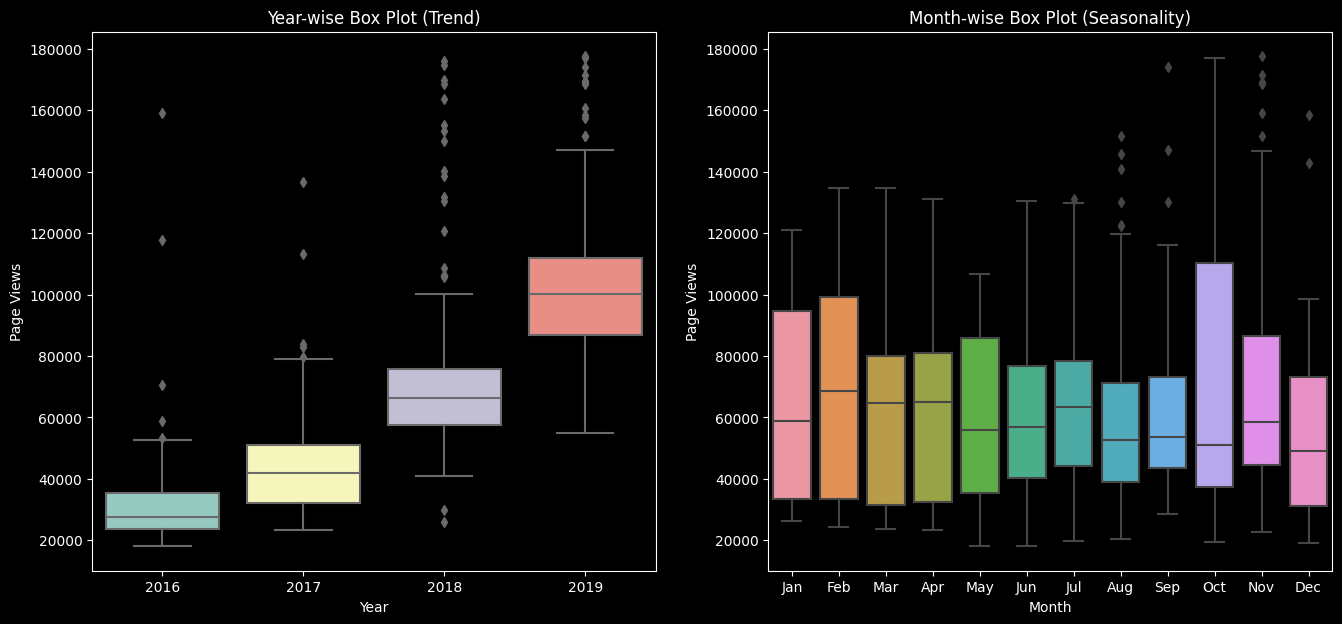

In [61]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    working_df_box = df.copy()
    working_df_box.reset_index(inplace=True)
    working_df_box['year'] = [d.year for d in working_df_box.date]
    working_df_box['m'] = [d.month for d in working_df_box.date]
    working_df_box.sort_values('m', inplace=True)
    df_box = pd.DataFrame(
    {
    'Month': working_df_box['m'].apply(lambda t: month_labels[t - 1][:3]),
    'Year': working_df_box['year'],
    'Page Views': working_df_box['value']
    }
    )

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    sns.boxplot(data=df_box, ax=axes[0], x='Year', y='Page Views')
    sns.boxplot(data=df_box, ax=axes[1], x='Month', y='Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig